## Rosenblatt
最適な重み係数を自動的に学習したあと、入力信号とかけあわせ、ニューロンが発火するかどうか判断する

- 1 (陽性クラス)
- -1(陰性クラス)

活性化関数　$\phi$ 引数は入力値$x$と重みベクトル$w$の線形結合

閾値$\theta$より大きい場合は1,小さい場合は-1

### 手順

1. 重みを0または値の小さい乱数で初期化
1. トレーニングサンプル$x^{(i)}$ごとに以下の手順を実行
    1. 出力値$\hat{y}$を計算
    1. 重みを更新

ここでの出力値は、単位ステップ関数によって予測されるクラスラベル  
$$w_j := w_j + \Delta w_j$$

$\Delta w_j$の値はパーセプトロンの学習規則に基づいて計算される  
$$\Delta w_j = \eta(y^{(i)} - \hat{y}^{(i)})x^{(i)}_j$$

$\eta$は学習率(0.0よりも大きく1.0以下の定数)  
$y^{(i)}$は**本当**のクラスラベル  
$\hat{y}^{(i)}$は予測されたクラスラベル  



In [1]:
import numpy as np
class Perceptron(object):
    """パーセプトロンの分類器
    
    パラメータ
    ------------------
    eta : float
        学習率 (0.0より大きく1.0以下の値)
    n_iter : int
        トレーニングデータのトレーニング回数
    
    属性
    -------------------
    w_ : １次元配列
        適合後の重み
    errors_ : リスト
        各エポックでの誤分類数
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """トレーニングデータに適合させる
        
        パラメータ
        -----------------
        X : { 配列のようなデータ構造 }, shape = [n_samples, n_features]
            トレーニングデータ
            n_sampleはサンプルの個数, n_featureは特徴量の個数
        y : 配列のようなデータ構造 , shape = [n_samples]
            目的関数
        
        戻り値
        -----------------
        self : object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                # 重みw_1~w_mの更新
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                # 重みw_0の更新
                self.w_[0] += update
                # 重みの更新が0でない場合は誤分類としてカウント
                errors += int(update != 0.0)
            # 反復回数ごとの誤差を格納
            self.errors_.append(errors)
        
        return self
    
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## 2.3 Irisデータセットでトレーニング

In [2]:
import pandas as pd
df = pd.read_csv("iris.csv", header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
# 1-100行目の目的変数の抽出
y = df.iloc[0:100, 4].values
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [5]:
# setosaを-1、versicolorを1
y = np.where(y == "setosa", -1, 1)

In [6]:
# 1-100行目の1,3列目の抽出
X = df.iloc[0:100, [0, 2]].values

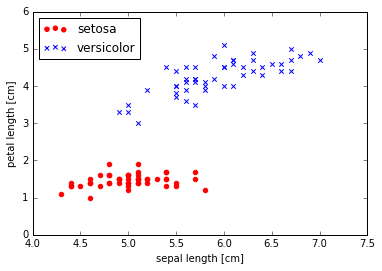

In [7]:
# 品種setosaのプロット(赤の○)
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label="setosa")
# 品種versicolorのプロット(青の×)
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label="versicolor")
# 軸のラベル設定
plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
# 凡例の設定(左上に配置)
plt.legend(loc="upper left")
# 図の表示
plt.show()

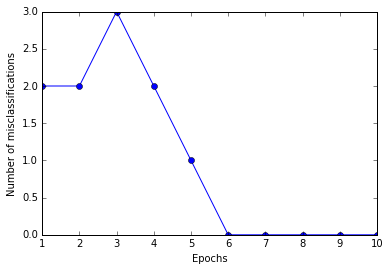

In [8]:
# パーセプトロンのオブジェクトの生成(インスタンス化)
ppn = Perceptron(eta=0.1, n_iter=10)
# トレーニングデータへのモデルの適合
ppn.fit(X, y)
# エポックと誤分類誤差の関係の折れ線グラフをプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
# 軸のラベルの設定
plt.xlabel("Epochs")
plt.ylabel("Number of misclassifications")
# 図の表示
plt.show()

グラフからみるに、6回目のエポックのあと、パーセプトロンはすでに収束している。  

二次元データの決定境界を可視化するために、簡単で便利な関数を実装する。  

1. colorsとmarkersを複数定義したあと、ListedColormapを使って色のリストからカラーマップを作成する。
1. 2つの特徴量の最小値と最大値を求め、それらの特徴ベクトルを使ってグリッド配列xx1とxx2のペアを作成する。
1. 2次元の特徴量で分類器をトレーニングしたため、グリッド配列を1次元にし、Irisトレーニングサブセットと同じ個数の列を持つ行列を作成する
1. predictメソッドを使って対応するグリッドポイントのクラスラベルzを予測する
1. クラスラベルzを予測したあと、xx1及びxx2と同じ次元をもつグリッドに作り変えた上で、等高線図を描画できる(plt.contourf関数を用いる)

In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                              np.arange(x2_min, x2_max, resolution))
    
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(idx),
                           marker=markers[idx], label=cl)

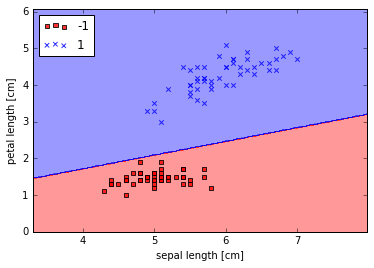

In [10]:
# 決定境界のプロット
plot_decision_regions(X, y, classifier=ppn)
# 軸のラベル設定
plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
# 凡例の設定(左上に配置)
plt.legend(loc="upper left")
# 図の表示
plt.show()

## 2.4 ADALINEと学習の収束

Rosenblattとの主な違い

- 重みの更新法
  - $\phi(z)$は単に総入力の恒等関数
  - クラスラベルの予測には量子化器を使用
- モデル誤差の計算と重みの更新に2値のクラスラベルを使用するのではなく、連続値の出力を使用する

## 2.5 勾配降下法によるコスト関数の最小化

$$J(w) = \frac{1}{2}\sum_i\bigl(y^{(i)}-\phi(z^{(i)})\bigr)^2$$

1/2の項は便宜上の追加したものにすぎない  

重み更新  
$$w := w + \Delta w$$

重みの変化である$\Delta w$は、負の勾配に学習率$\eta$を掛けたものとして定義される  
$$\Delta w = -\eta\Delta J(w)$$

コスト関数の勾配を計算するには、重み$w_j$ごとに偏微分係数を計算する
$$\frac{\delta J}{\delta w_j} = -\sum_i \bigl(y^{(i)} - \phi(z^{(i)})\bigr)x^{(i)}_j$$

よって  
$$\Delta w_j = -\eta\frac{\delta J}{\delta w_j} = \eta\sum_i \bigl(y^{(i)} - \phi(z^{(i)})\bigr)x^{(i)}_j$$

In [11]:
class AdalineGD(object):
    """ADAptive LInear NEuron分類器
    
    パラメータ
    -------------------
    eta : float
        学習率(0.0より大きく1.0以下の値)
    n_iter : int
        トレーニングデータのトレーニング回数
    
    属性
    -------------------
    w_ : 1次元配列
        適合後の重み
    errors_ : リスト
        各エポックでの誤分類数
    
    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """トレーニングデータに適合させる
        
        パラメータ
        -----------------
        X : { 配列のようなデータ構造 }, shape = [n_samples, n_features]
                トレーニングデータ
        y : 配列のようなデータ構造, shape = [n_samples]
                目的関数
        
        戻り値
        ------------------
        self : object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter): # トレーニング回数分トレーニングデータを反復
            # 活性化関数の出力の計算(恒等関数)
            output = self.net_input(X)
            # 誤差の計算
            errors = (y - output)
            # w_1 ~ w_mの更新
            self.w_[1:] += self.eta * X.T.dot(errors)
            # w_0の更新
            self.w_[0] += self.eta * errors.sum()
            # コスト関数の計算
            cost = (errors**2).sum() / 2.0
            # コストの格納
            self.cost_.append(cost)
        
        return self
    
    def net_input(self ,X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """線形活性化関数の出力を計算"""
        return self.net_input(X)
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

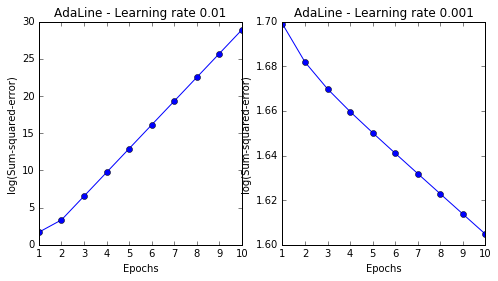

In [12]:
# 描画領域を1行2列に分割
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
# 勾配降下法によるADALINEの学習(学習率 eta=0.01)
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
# エポック数とコストの関係を表す折れ線グラフのプロット(縦軸のコストは常用対数)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
# 軸のラベル設定
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Sum-squared-error)")
# タイトルの設定
ax[0].set_title('AdaLine - Learning rate 0.01')
# 勾配降下法によるADALINEの学習(学習率 eta=0.0001)
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
# エポック数とコストの関係を表す折れ線グラフのプロット(縦軸のコストは常用対数)
ax[1].plot(range(1, len(ada2.cost_)+1), np.log10(ada2.cost_), marker='o')
# 軸のラベル設定
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("log(Sum-squared-error)")
# タイトルの設定
ax[1].set_title("AdaLine - Learning rate 0.001")
# 図の表示
plt.show()

右のグラフ(eta=0.01)ではOverShoot
左のグラフ(eta=0.0001)は収束するのに相当な数のエポックが必要になることが伺える

### 標準化
特徴量のスケーリングを行い最適なパフォーマンスを試みる  

標準正規分布の特性(各特徴量の平均を0にし、標準偏差を1にする)  

$j$番目の特徴量を標準化するには、サンプルの平均$\mu_j$をすべてのサンプルから引き、標準偏差$\sigma_j$で割れば良い。
$$ x'_j = \frac{x_j - \mu_j}{\sigma_j}$$

In [13]:
# データのコピー
X_std = np.copy(X)
# 各列の標準化
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

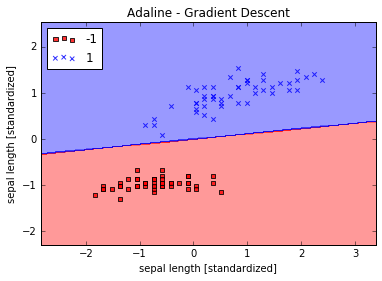

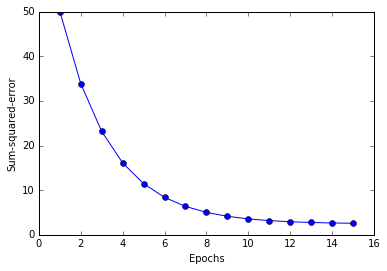

In [14]:
# 勾配降下法によるADALINEの学習(標準化後、学習率eta=0.01)
ada = AdalineGD(n_iter=15, eta=0.01)
# モデルの適合
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
# タイトルの設定
plt.title("Adaline - Gradient Descent")
# 軸のラベルの設定
plt.xlabel("sepal length [standardized]")
plt.ylabel("sepal length [standardized]")
# 凡例の設定(左上に配置)
plt.legend(loc="upper left")
# 図の表示
plt.show()
# エポック数とコストの汗液を表す折れ線グラフのプロット
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
# 軸のラベル設定
plt.xlabel("Epochs")
plt.ylabel("Sum-squared-error")
# 図の表示
plt.show()

## 2.6 大規模な機械学習と確率的勾配降下法
いままでのはバッチ勾配降下法である  
**確率的勾配降下法**はすべてのサンプル$x^{(i)}$にわたって蓄積された誤分類の合計を用いて重みを更新するのではない  
$$ \Delta w = \eta \sum_i \bigl(y^{(i)} - \phi(z^{(i)}\bigr)x^{(i)} $$
以下のように、トレーニングサンプルごとに段階的に重みを更新する  
$$ \eta\bigl(y^{(i)} - \phi(z^{(i)})\bigr)x^{(i)} $$

ADALINEの学習則の変更

- fitメソッドはトレーニングサンプルごとに重みを更新
- オンライン学習にあわせて、重みの再初期化を行わないpartial_fitメソッドを追加
- トレークング後にアルゴリズムが収束したかどうかを確認するには、サンプルの平均コストとしてエポックごとのコストを計算する
- 各エポックの前にデータをシャッフル(shuffle)するオプションも追加(循環を避けるための措置)
- 整合性を保つためにrandom_stateパラメータを使って乱数種を指定

In [17]:
from numpy.random import seed
class AdalineSGD(object):
    """ADAptive LInear NEuron分類器
    
    パラメータ
    -------------------
    eta : float
        学習率(0.0より大きく1.0以下の値)
    n_iter : int
        トレーニングデータのトレーニング回数
    
    属性
    -------------------
    w_ : 1次元配列
        適合後の重み
    errors_ : リスト
        各エポックでの誤分類数
    shuffle : bool(デフォルト : True)
        循環を回避するために各エポックでトレーニングデータをシャッフル
    random_state : int (デフォルト : None)
        シャッフルに使用するrandom_stateを設定し、重みを初期化
    
    """
    def __init__(self, eta=0.01, n_iter=50, shuffle=None, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        # 重みの初期化フラグはFalseに設定
        self.w_initialized = False
        # 各エポックでトレーニングデータをシャッフルするかどうかのフラグを初期化
        self.shuffle = shuffle
        # 引数random_stateが指定された場合は乱数種を設定
        if random_state:
            seed(random_state)
    
    def fit(self, X, y):
        """トレーニングデータに適合させる
        
        パラメータ
        -----------------
        X : { 配列のようなデータ構造 }, shape = [n_samples, n_features]
                トレーニングデータ
        y : 配列のようなデータ構造, shape = [n_samples]
                目的関数
        
        戻り値
        ------------------
        self : object
        
        """
        # 重みベクトルの作成
        self._initialize_weights(X.shape[1])
        # コストを格納するリストの作成
        self.cost_ = []
        
        # トレーニング回数分トレーニングデータを反復
        for i in range(self.n_iter):
            # 指定された場合はトレーニングデータをシャッフル
            if self.shuffle:
                X, y = self._shuffle(X, y)
            # 各サンプルのコストを格納するリストの作成
            cost = []
            # 各サンプルに対する計算
            for xi, target in zip(X, y):
                # 特徴量xiと目的変数yを用いた重みの更新とコストの計算
                cost.append(self._update_weights(xi, target))
            # サンプルの平均コストの計算
            avg_cost = sum(cost)/len(y)
            # 平均コストを格納
            self.cost_.append(avg_cost)
        
        return self
    
    def partial_fit(self, X, y):
        """重みを再初期化することなくトレーニングデータに適合させる"""
        # 初期化されていない場合は初期化を実行
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        # 目的変数 yの要素数が2以上の場合は
        # 各サンプルの特徴量xiと目的変数targetで重みを更新
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        # 目的変数yの要素数が1の場合は
        # サンプル全体の特徴量Xと目的変数yで重みを更新
        else:
            self._update_weights(X, y)
        
        return self
    
    def _shuffle(self, X, y):
        """トレーニングデータをシャッフル"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """重みを0に初期化"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        """ADALINE学習規則を用いて重みを更新"""
        # 活性化関数の出力の計算
        output = self.net_input(xi)
        # 誤差の計算
        error = (target - output)
        # 重みw1~wmの計算
        self.w_[1:] += self.eta * xi.dot(error)
        # 重みw0の計算
        self.w_[0] += self.eta * error
        # コストの計算
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:] ) + self.w_[0]
    
    def activation(self, X):
        """整形活性化関数の出力を計算"""
        return self.net_input(X)
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

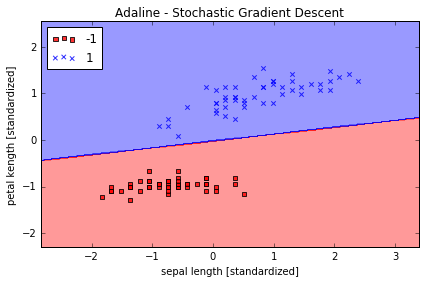

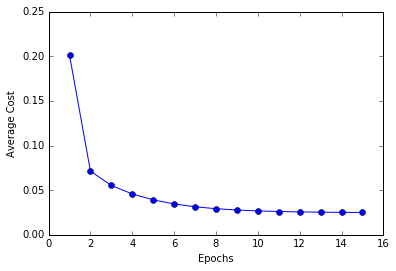

In [18]:
# 確率的勾配降下法によるADALINEの学習
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
# モデルへの適合
ada.fit(X_std, y)
# 境界領域のプロット
plot_decision_regions(X_std, y, classifier=ada)
# タイトルの設定
plt.title("Adaline - Stochastic Gradient Descent")
# 軸のラベルの設定
plt.xlabel("sepal length [standardized]")
plt.ylabel("petal kength [standardized]")
# 凡例の設定(左上に配置)
plt.legend(loc="upper left")
plt.tight_layout()
# プロットの表示
plt.show()
# エポックとコストの折れ線グラフのプロット
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
# 軸のラベル設定
plt.xlabel("Epochs")
plt.ylabel("Average Cost")
# プロットの表示
plt.show()

このモデルをオンライン学習においてストリーミングデータを使って  
更新したい場合は、個々のサンプルでpartial_fitメソッドを呼び出すだけで良い  

このメソッドの呼び出しはたとえばada.partial_fit(X_std[0, :], y[0])のようになる。